## Notebook for plots ex 1 - Weak MPI scalability

In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Import the data 

In [3]:
# -----------------STATIC----------------------------------------
path_THIN_static_1 = 'static/THIN_static_.csv'
path_THIN_static_2 = 'static/THIN_static_2.csv'
path_THIN_static_3 = 'static/THIN_static_3.csv'


THIN_static_1 = pd.read_csv(path_THIN_static_1)
THIN_static_2 = pd.read_csv(path_THIN_static_2)
THIN_static_3 = pd.read_csv(path_THIN_static_3)

# -----------------ORDERED----------------------------------------
path_THIN_ordered_1 = 'ordered/THIN_ordered_.csv'
path_THIN_ordered_2 = 'ordered/THIN_ordered_2.csv'

THIN_ordered_1 = pd.read_csv(path_THIN_ordered_1)
THIN_ordered_2 = pd.read_csv(path_THIN_ordered_2)




## Manipulate the data

In [4]:
# extract the first row for the x axis

n_threads = THIN_static_1['mpi_task']
n_threads = sorted(n_threads.unique())


In [5]:
# MPI 1

THIN_static_means_1 = THIN_static_1.groupby(['mpi_task']).mean().to_numpy()[:,1]
THIN_static_std_1 = THIN_static_1.groupby(['mpi_task']).std().to_numpy()[:,1]

# MPI 2

THIN_static_means_2 = THIN_static_2.groupby(['mpi_task']).mean().to_numpy()[:,1]
THIN_static_std_2 = THIN_static_2.groupby(['mpi_task']).std().to_numpy()[:,1]

# MPI 3

THIN_static_means_3 = THIN_static_3.groupby(['mpi_task']).mean().to_numpy()[:,1]
THIN_static_std_3 = THIN_static_3.groupby(['mpi_task']).std().to_numpy()[:,1]


#--------------ORDERED---------------


# MPI 1

THIN_ord_means_1 = THIN_ordered_1.groupby(['mpi_task']).mean().to_numpy()[:,1]
THIN_ord_std_1 = THIN_ordered_1.groupby(['mpi_task']).std().to_numpy()[:,1]

# MPI 2

THIN_ord_means_2 = THIN_ordered_2.groupby(['mpi_task']).mean().to_numpy()[:,1]
THIN_ord_std_2 = THIN_ordered_2.groupby(['mpi_task']).std().to_numpy()[:,1]


In [9]:
THIN_static_speed_1 = THIN_static_means_1[0]/THIN_static_means_1
THIN_static_speed_2 = THIN_static_means_2[0]/THIN_static_means_2
THIN_static_speed_3 = THIN_static_means_3[0]/THIN_static_means_3

THIN_ord_speed_1 = THIN_ord_means_1[0]/THIN_ord_means_1
THIN_ord_speed_2 = THIN_ord_means_2[0]/THIN_ord_means_2



## Plot

### 1 MPI - static



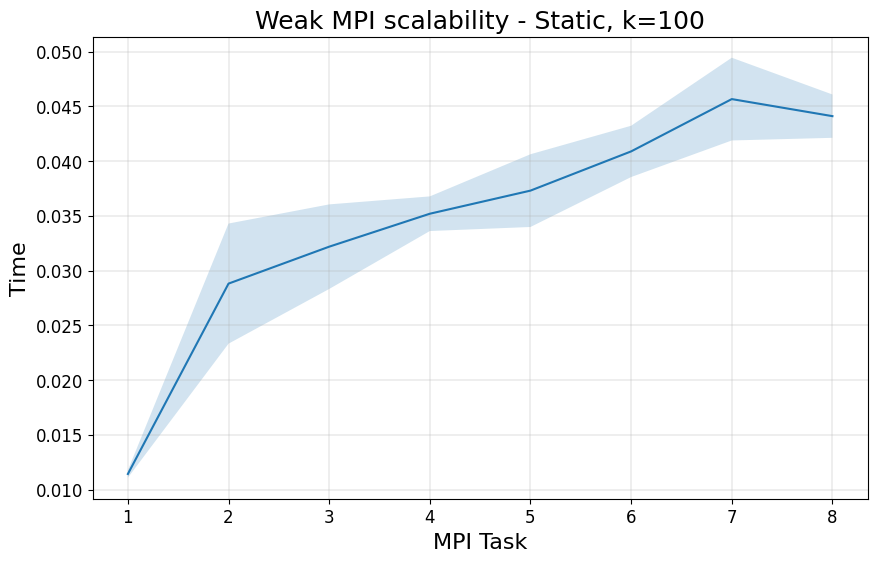

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, THIN_static_means_1)

plt.fill_between(n_threads, THIN_static_means_1 - THIN_static_std_1, THIN_static_means_1 + THIN_static_std_1, alpha=0.2)

plt.xlabel('MPI Task', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Weak MPI scalability - Static, k=100', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(linewidth = 0.3)
plt.show()


### 2 MPI - static

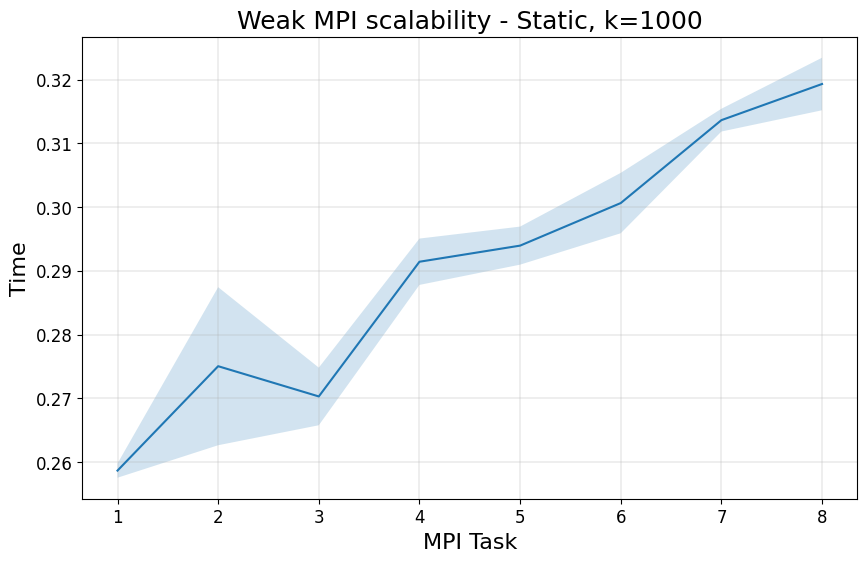

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, THIN_static_means_2)

plt.fill_between(n_threads, THIN_static_means_2 - THIN_static_std_2, THIN_static_means_2 + THIN_static_std_2, alpha=0.2)

plt.xlabel('MPI Task', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Weak MPI scalability - Static, k=1000', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(linewidth = 0.3)
plt.show()


### 3 MPI task - static

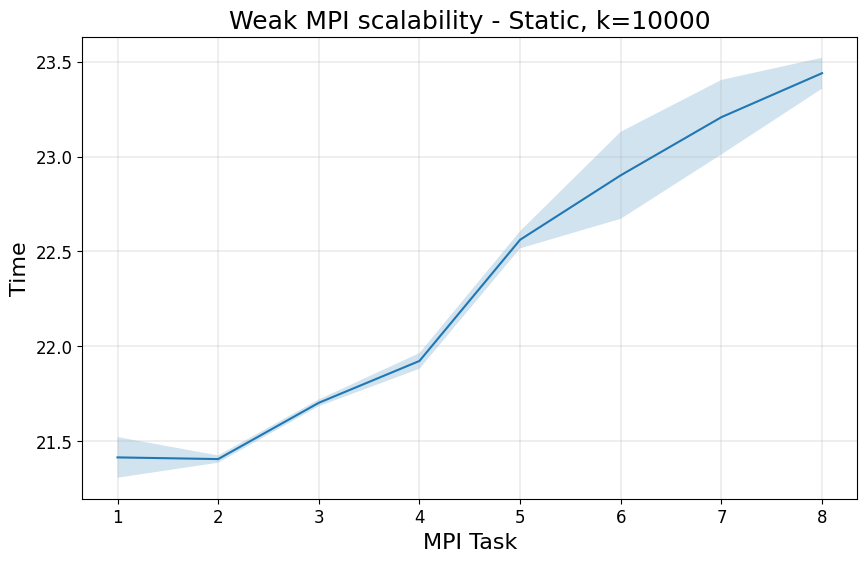

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, THIN_static_means_3)

plt.fill_between(n_threads, THIN_static_means_3 - THIN_static_std_3, THIN_static_means_3 + THIN_static_std_3, alpha=0.2)

plt.xlabel('MPI Task', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Weak MPI scalability - Static, k=10000', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(linewidth = 0.3)
plt.show()


### 1 MPI - ordered


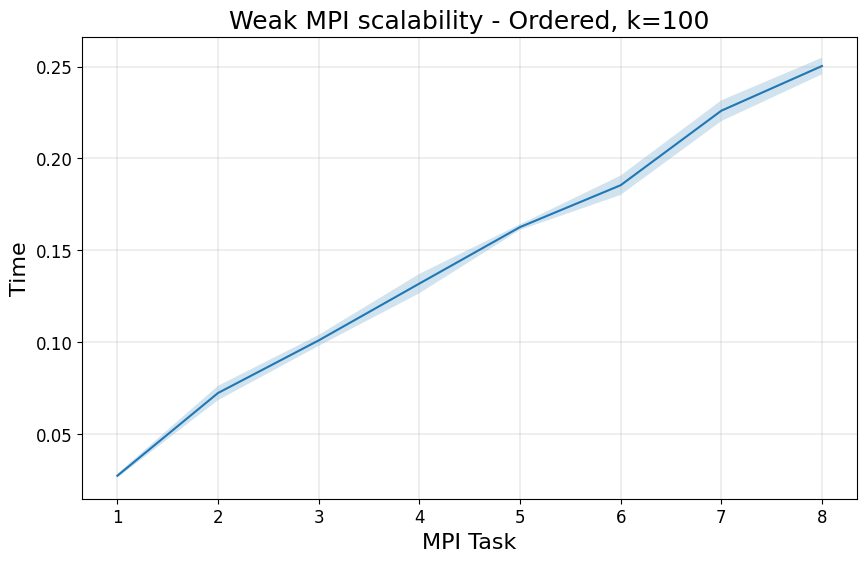

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, THIN_ord_means_1)

plt.fill_between(n_threads, THIN_ord_means_1 - THIN_ord_std_1, THIN_ord_means_1 + THIN_ord_std_1, alpha=0.2)

plt.xlabel('MPI Task', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Weak MPI scalability - Ordered, k=100', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(linewidth = 0.3)
plt.show()


### 2 MPI ordered

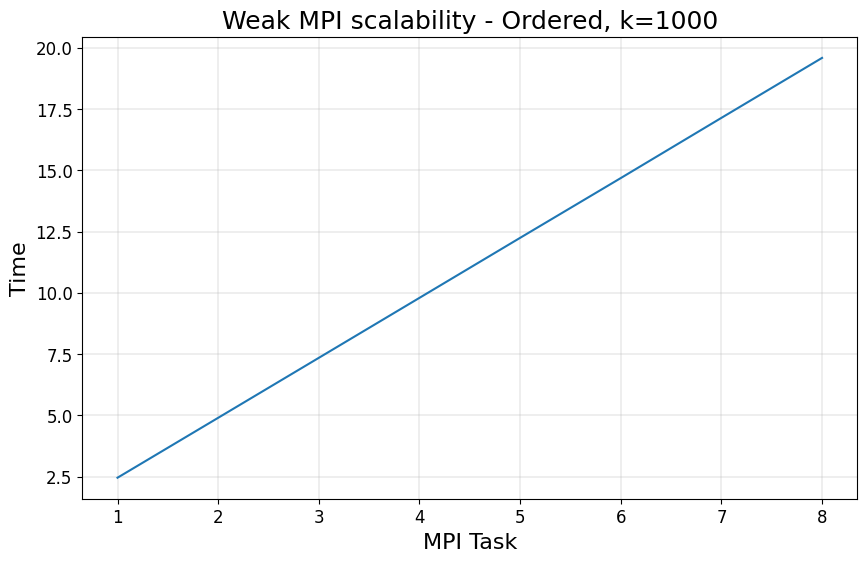

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, THIN_ord_means_2)

plt.fill_between(n_threads, THIN_ord_means_2 - THIN_ord_std_2, THIN_ord_means_2 + THIN_ord_std_2, alpha=0.2)

plt.xlabel('MPI Task', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Weak MPI scalability - Ordered, k=1000', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(linewidth = 0.3)
plt.show()


### Speedup - static 

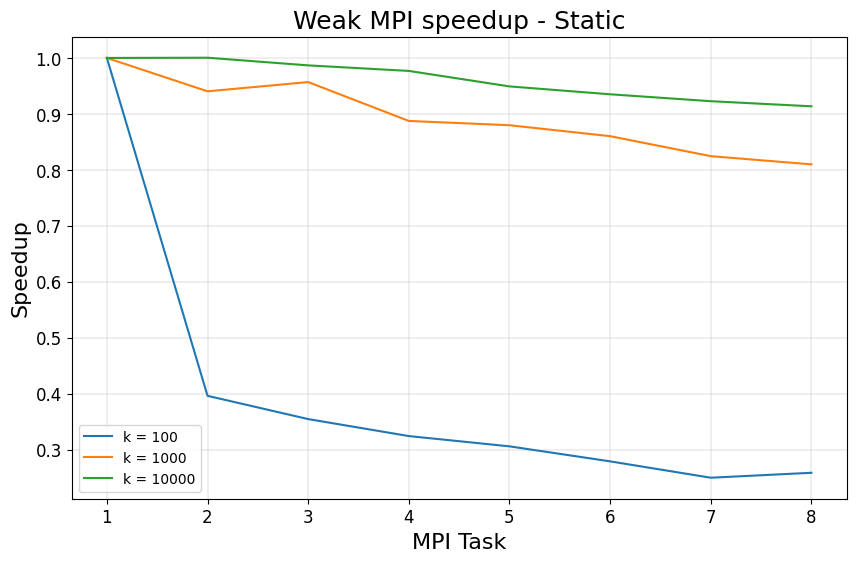

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, THIN_static_speed_1, label = 'k = 100')
plt.plot(n_threads, THIN_static_speed_2, label = 'k = 1000')
plt.plot(n_threads, THIN_static_speed_3, label = 'k = 10000')



plt.xlabel('MPI Task', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Weak MPI speedup - Static', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.grid(linewidth = 0.3)
plt.show()


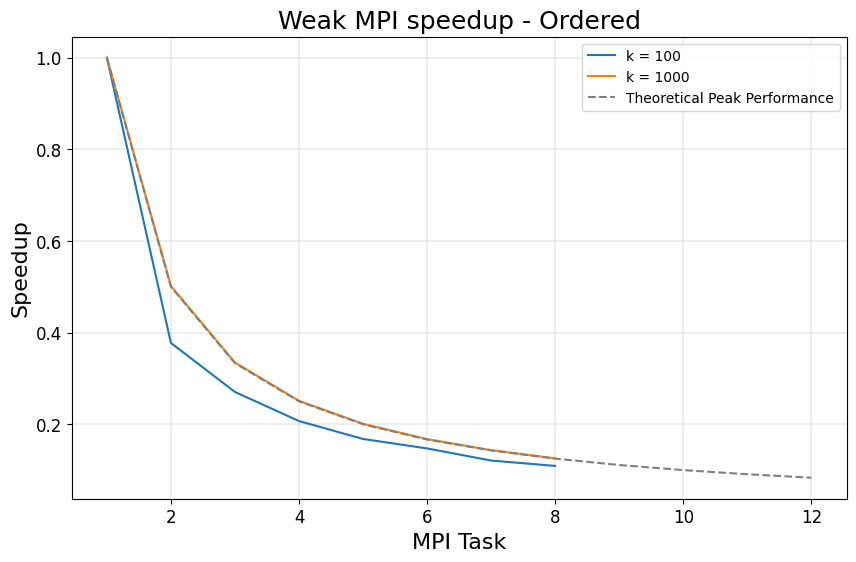

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, THIN_ord_speed_1, label = 'k = 100')
plt.plot(n_threads, THIN_ord_speed_2, label = 'k = 1000')

x_values = np.arange(1, 13, 1)
plt.plot(x_values, 1/x_values, c = "gray", linestyle="dashed", label="Theoretical Peak Performance")

plt.xlabel('MPI Task', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Weak MPI speedup - Ordered', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.grid(linewidth = 0.3)
plt.show()
